In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import os
import warnings

from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
df = pd.read_csv('/Volumes/External/dataset/Mall-Customers/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization

In [7]:
plt.style.use('fivethirtyeight')

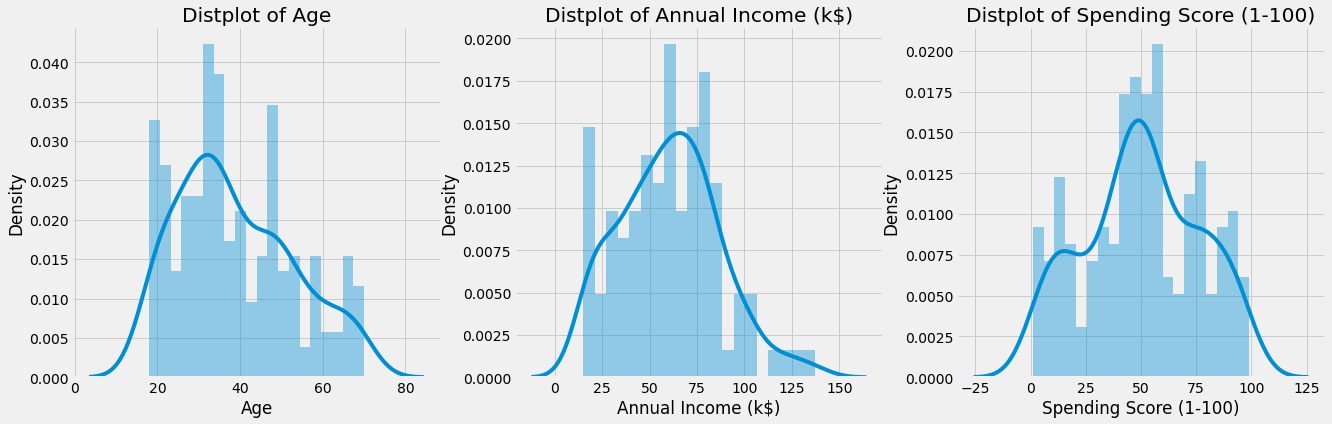

In [10]:
plt.figure(1, figsize=(20, 6))
for idx, label in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, idx+1)
    sns.distplot(df[label], bins=20)
    plt.title(f"Distplot of {label}")
plt.show()

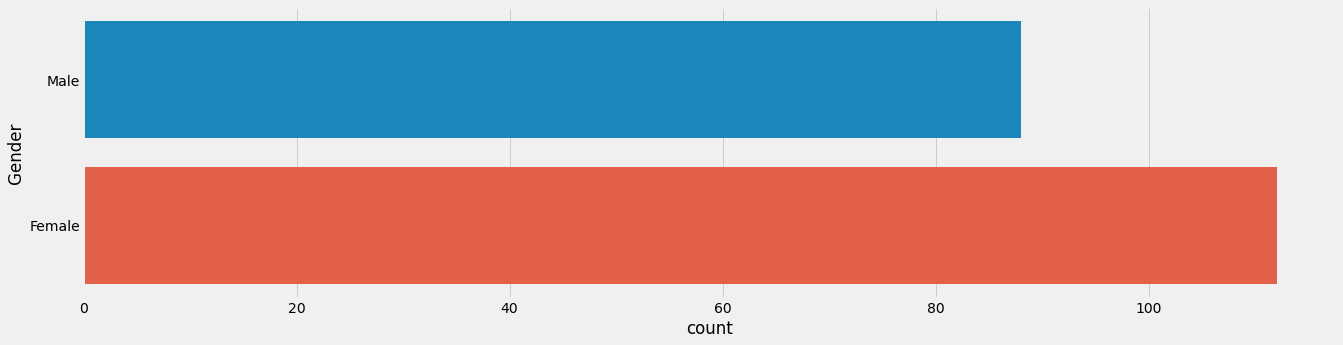

In [11]:
plt.figure(1, figsize=(20, 5))
sns.countplot(y='Gender', data=df)
plt.show()

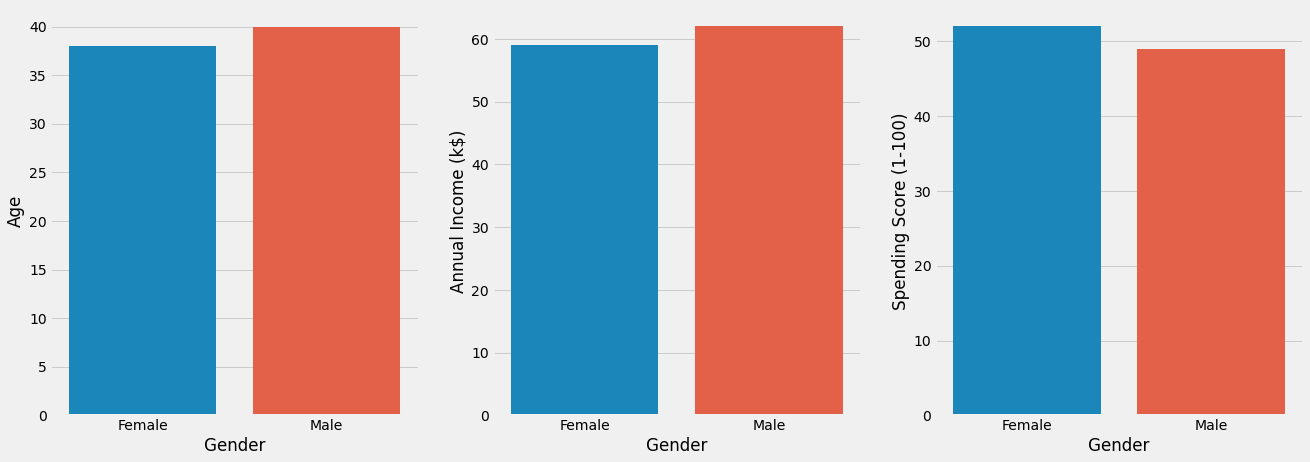

In [12]:
df_mean = df.groupby('Gender').mean().round(0).reset_index()
# df_mean.loc['Female']
plt.figure(1, figsize=(20, 7))
for idx, label in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, idx+1)
    sns.barplot(x='Gender', y=label, data=df_mean)
plt.show()

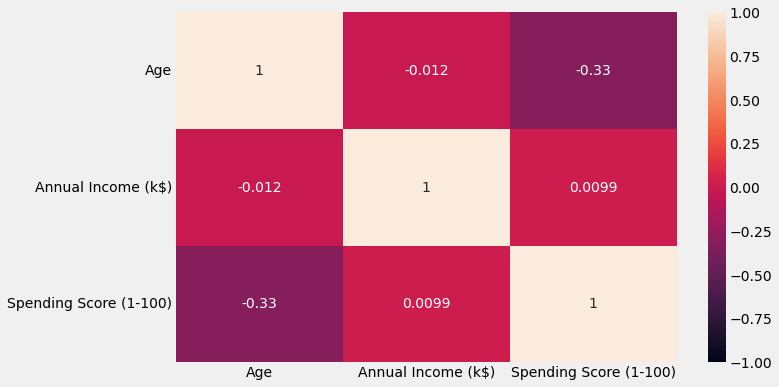

In [33]:
plt.figure(1 , figsize = (10, 6))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

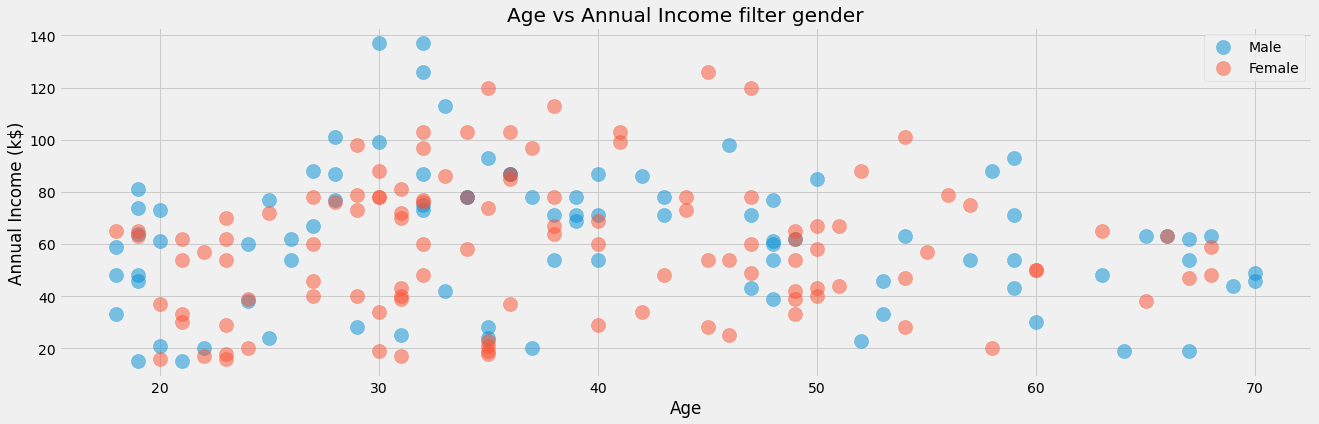

In [13]:
plt.figure(1, figsize=(20, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender], s=200, alpha=0.5, label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income filter gender')
plt.legend()
plt.show()

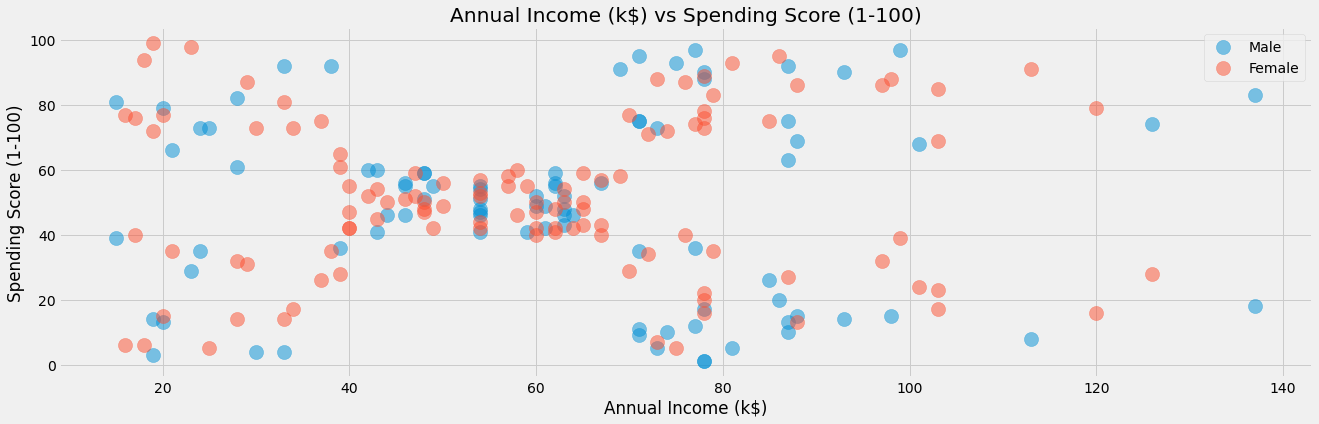

In [14]:
plt.figure(1, figsize=(20, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df[df['Gender'] == gender], s=200, alpha=0.5, label=gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.legend()
plt.show()

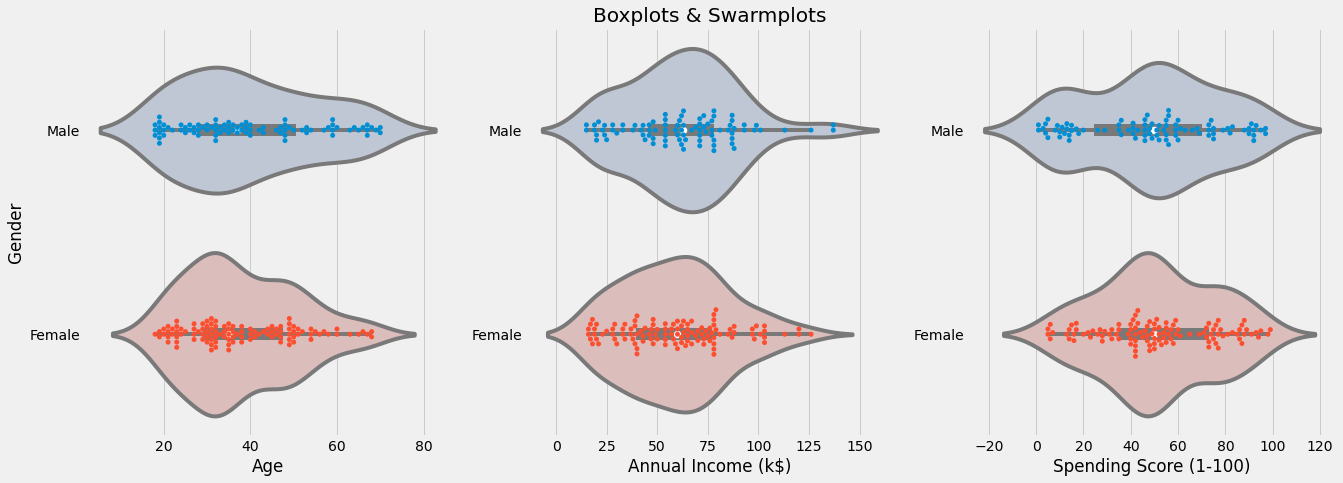

In [15]:
plt.figure(1, figsize=(20, 7))
for idx, label in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, idx+1)
    sns.violinplot(x=label, y='Gender', data=df, palette='vlag')
    sns.swarmplot(x=label, y='Gender', data=df)
    plt.ylabel('Gender' if idx == 0 else '')
    plt.title('Boxplots & Swarmplots' if idx == 1 else '')
plt.show()

## Summary of EDA
After I have explored and visualized data. I can see the number of women more than men and the distributions are fairly relative between men and women in the data. On average, men are older than women and earn higher, but women have spend more than men it can see in the graph of spending scores vs gender. It have a negative correlation between spending score and age at -0.33. I can see that customers get older. they tend to spend less than younger. 

# Clustering use K-Means

In [21]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
for n in range(1, 11):
    kmean = KMeans(n_clusters=n, random_state=99).fit(X)
    inertia.append(kmean.inertia_)

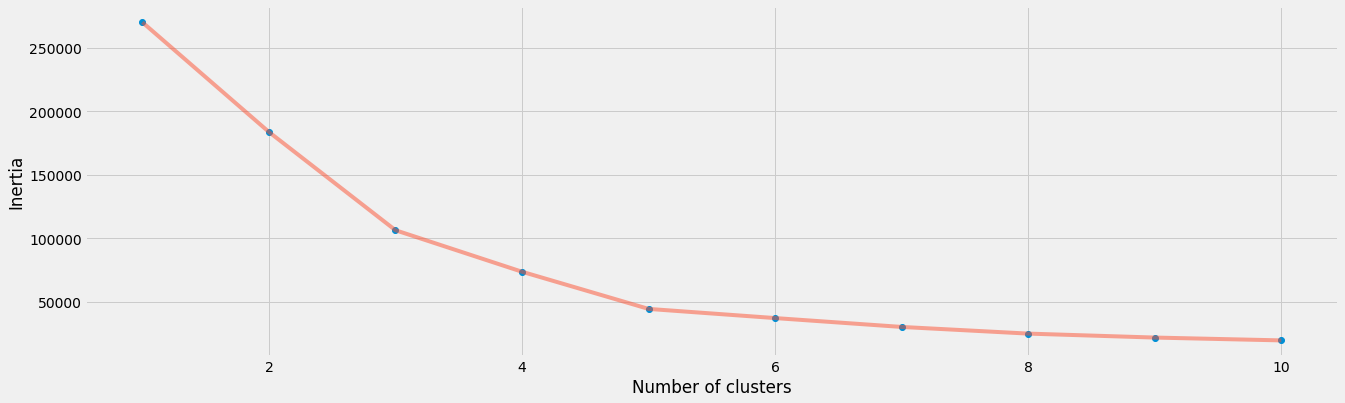

In [22]:
plt.figure(1, figsize=(20, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [35]:
kmean_pred = KMeans(n_clusters=5, random_state=99).fit_predict(X)
result = df.copy()
result['labels'] = kmean_pred
result['labels'] = result['labels'].astype(str)

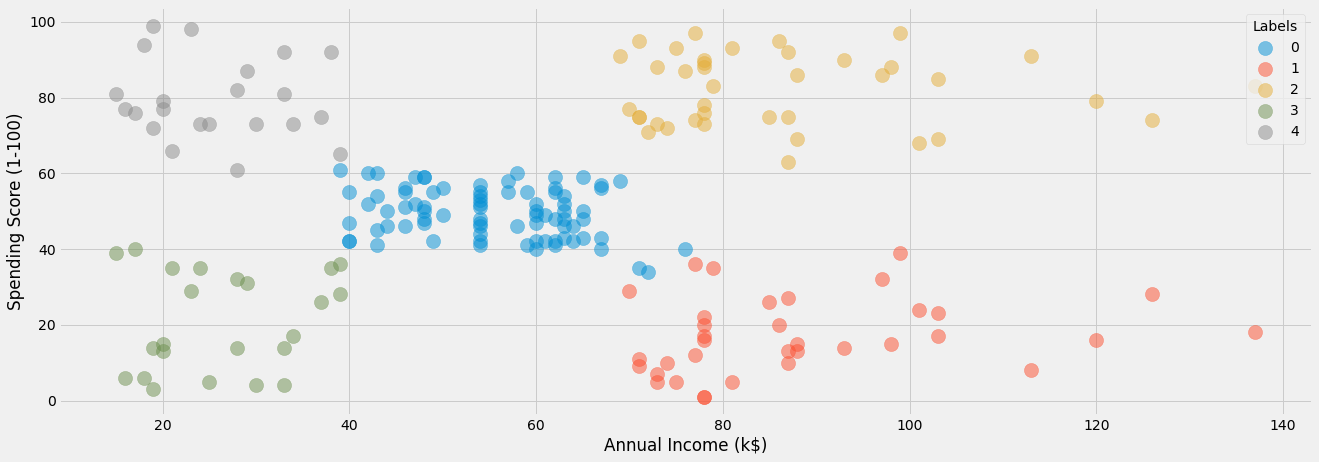

In [51]:
plt.figure(1, figsize=(20, 7))
for label in ['0', '1', '2', '3', '4']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=result[result['labels'] == label], s=200, alpha=0.5, label=label)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper right', title='Labels')
plt.show()

## Summary kmean clustering
In the figure presented, the cluster can be devided into 5 clusters: 0, 1, 2, 3, 4.
- Cluster 0 (Blue) =>  earning average | spending average
- Cluster 1 (Red) => earning high | spending low
- Cluster 2 (Yellow) => earning high | spending high
- Cluster 3 (Green) => earning low | spending low
- Cluster 4 (Grey) => earning low | spending high

If you want to save customers. You could save **_the cluster 3_** because customers in this cluster have earning high and tend spending more. 